#Aluno: Robson Luis Silva
###Matrícula: 1922120007

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

In [3]:
df['class'].unique()

array([0, 1, 2])

As variáveis do dataset são:

• sepal length (cm) : comprimento da sépala

• sepal width (cm) : largura da sépala

• petal length (cm) : comprimento da pétala

• petal width (cm) : largura da pétala

• class : classe, onde 0 = sentosa, 1 = versicolor e 2 = virginica

Após importados os dados, separe as variáveis X e y, onde no X use apenas as variáveis relacionadas às pétalas.


In [4]:
cols = ['petal length (cm)','petal width (cm)']
            
X = df.loc[:, cols].values
y = df.loc[:, 'class'].values

Em seguida, crie os dados em treino e teste (X_train, X_test, y_train, y_test). É sempre recomendado definir um random_state e passar o parâmetro stratify=y, ao separar treino e teste.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)


Aplique um StandardScaler nas variáveis X_train e X_test

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Faça uma classificação usando Regressão Logística, para isso utilize a biblioteca do scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(C=100.0, random_state=1)
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)

Obtenha a acurácia do modelo

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
lr1.coef_

array([[-6.41233763, -5.7461974 ],
       [-0.07053466, -0.91741078],
       [ 6.48287229,  6.66360818]])

Monte uma matriz de confusão do modelo


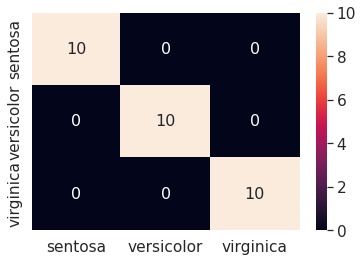

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, ['sentosa', 'versicolor', 'virginica'], ['sentosa', 'versicolor', 'virginica'])
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

Repita o procedimento utilizado agora somente as variáveis relacionadas às sépalas, em seguida utilizando todas as variáveis (compare os resultados).

In [12]:
cols = ['sepal length (cm)','sepal width (cm)']
            
X = df.loc[:, cols].values
y = df.loc[:, 'class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr2 = LogisticRegression(C=100.0, random_state=1)
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.73


In [13]:
lr2.coef_

array([[-9.43585563,  4.22091739],
       [ 3.72350139, -2.22246146],
       [ 5.71235424, -1.99845593]])

Repita o procedimento utilizado agora todas as variáveis

In [14]:
cols = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
            
X = df.loc[:, cols].values
y = df.loc[:, 'class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr3 = LogisticRegression(C=100.0, random_state=1)
lr3.fit(X_train, y_train)
y_pred = lr3.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 1.00


Por fim, você pode obter quais as variáveis mais importantes a partir do atributo .coef_ após o modelo ser treinado.

In [15]:
lr3.coef_

array([[-2.12333945,  2.6098853 , -5.56251081, -5.37120676],
       [ 1.84865554, -0.26504509, -2.11968394, -2.52037495],
       [ 0.27468391, -2.34484021,  7.68219475,  7.89158171]])